<a href="https://colab.research.google.com/github/PriscillaMuli/Finance-Investment-Price-Prediction-Python-Project/blob/main/Finance_Investment_Portfolio_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

# **1. Project Objective**


**1.1 The Context: Defining the Question**

Stock market price prediction is a key valuation, finance and accounting exercise which provides clarity in the risky exercise of making financial investment decisions.The aim of this project is to build a forecasting model using the Long Short Term Memory (LSTM) model of future share price utilizing a portfolio of 4 stocks namely: Apple, Facebook, Google and Tesla. This is done using a reference index (S&P 500). Long Short Term Memory is a subset of neural networks. Prediction is done with heavy reliance on historical data to build a predictive model. For this project, I use 5 years of historical data.  

**1.2. Metric for Success**

The metric for success utilized in this project is the best performing model which gives the highest accuracy score and which has the lowest figure of root mean square error.

**1.3. Recording The Experimental Design**

The following design was used:

1. Data importation - loading the dataset with appropriate libraries to use

2. Data Cleaning - do the needed steps to clean the data

3. EDA - univariate and bivariate data analysis
- remove outliers that are not needed for the analysis

4. Build model - assess the performance of the models on the data at hand

5. Observations and recommendations - comment on each tested model's appropriateness in solving the problem

**1.4. Data Relevance**

The data provided was suitable for this data analysis considering the question given.



# **2. Data Importation**

In [ ]:
# Install pandas profiling
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 21.8 MB 146 kB/s
     |████████████████████████████████| 11.1 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 50.6 MB/s 
     |████████████████████████████████| 102 kB 51.7 MB/s 
     |████████████████████████████████| 690 kB 44.4 MB/s 
     |████████████████████████████████| 4.7 MB 35.8 MB/s 
     |████████████████████████████████| 812 kB 43.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=385dac872278b354945a69584ffb6e2d72726d09713ff8a8ce577e964b8aa263
  Stored in directory: /tmp/pip-ephem-wheel-cache-t7p27fr1/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=2d6bcf0895fd6d261999e630c44ee6ec8d4f8d8ff6e86ea14c94ddb28a367c9e
  Stored in direc

In [ ]:
#Installing relevant yahoo finance libraries 
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#importing the required libraries: matplotlib,Seaborn,pandas, numpy,Scipy, Yahoo Finance API, SKLearn, 
#keras for neural networks analysis, Scaler, Performance Evaluation Metrics,Train_Test_Split Method to split data from SKLearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')

import pandas_profiling as pp
import scipy
import sklearn
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,  mean_absolute_error
from sklearn.model_selection import train_test_split



# **Importing the Dataset**

In [ ]:
#Yahoo Finance stock data download
portfolio = yf.download(['FB','AAPL', 'TSLA','GOOGL' ],
start='2015-01-01',
end='2021-01-01',
progress=False, actions='inline')

In [ ]:
#Yahoo Finance S&P 500 2015-2021 Data
sp500 = yf.download('^GSPC',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

# **Data Descriptive Statistics**

In [ ]:
# Descriptive statistics of the Yahoo Stock Finance data such as average, 1st, 2nd and 3rd percentile
# Maximum and minimum, standard deviation, count
portfolio.describe()

Adj Close                                               Close  \
              AAPL           FB        GOOGL         TSLA         AAPL   
count  1511.000000  1511.000000  1511.000000  1511.000000  1511.000000   
mean     46.340262   158.390265  1019.493494    93.335042    48.117598   
std      25.427200    51.216046   300.194255   112.492452    25.091074   
min      20.978710    74.050003   497.059998    28.733999    22.584999   
25%      27.469914   117.730000   771.260010    45.424000    29.815000   
50%      39.652390   162.279999  1040.750000    56.835999    41.314999   
75%      52.176289   186.945000  1204.845032    69.494999    53.938751   
max     135.480591   303.910004  1824.969971   705.669983   136.690002   

                                                Dividends          ...  \
                FB        GOOGL         TSLA         AAPL      FB  ...   
count  1511.000000  1511.000000  1511.000000  1511.000000  1511.0  ...   
mean    158.390265  1019.493494    93.335042     0.002616     0.0  ...   
std      51.216046   300.194255   112.492452     0.020891     0.0  ...   
min      74.050003   497.059998    28.733999     0.000000     0.0  ...   
25%     117.730000   771.260010    45.424000     0.000000     0.0  ...   
50%     162.279999  1040.750000    56.835999     0.000000     0.0  ...   
75%     186.945000  1204.845032    69.494999     0.000000     0.0  ...   
max     303.910004  1824.969971   705.669983     0.205000     0.0  ...   

              Open              Stock Splits                               \
             GOOGL         TSLA         AAPL      FB   GOOGL         TSLA   
count  1511.000000  1511.000000  1511.000000  1511.0  1511.0  1511.000000   
mean   1019.214758    93.167311     0.002647     0.0     0.0     0.003309   
std     299.783796   111.904174     0.102903     0.0     0.0     0.128629   
min     499.239990    28.464001     0.000000     0.0     0.0     0.000000   
25%     770.554993    45.539000     0.000000     0.0     0.0     0.000000   
50%    1040.040039    56.658001     0.000000     0.0     0.0     0.000000   
75%    1201.364990    69.514000     0.000000     0.0     0.0     0.000000   
max    1820.540039   699.989990     4.000000     0.0     0.0     5.000000   

             Volume                                            
               AAPL            FB         GOOGL          TSLA  
count  1.511000e+03  1.511000e+03  1.511000e+03  1.511000e+03  
mean   1.459379e+08  2.258957e+07  1.885592e+06  4.010880e+07  
std    7.142285e+07  1.346545e+07  9.382239e+05  2.962906e+07  
min    4.544800e+07  5.913100e+06  4.656000e+05  3.540000e+06  
25%    9.743980e+07  1.456060e+07  1.327250e+06  2.129825e+07  
50%    1.280424e+08  1.913360e+07  1.651900e+06  3.081300e+07  
75%    1.754606e+08  2.565550e+07  2.129400e+06  4.779435e+07  
max    6.488252e+08  1.698037e+08  1.285810e+07  3.046940e+08  

[8 rows x 32 columns]

In [ ]:
# Descriptive statistics of the S&P500 data such as average, 1st, 2nd and 3rd percentile
# Maximum and minimum, standard deviation, count
sp500.describe()

Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean   2255.916994  2265.654882  2244.962123  2255.934738  2255.934738   
std     313.064846   313.752171   312.065689   312.580963   312.580963   
min    1743.819946  1755.790039  1737.920044  1741.890015  1741.890015   
25%    2019.290009  2030.549988  2006.095032  2020.647461  2020.647461   
50%    2122.714966  2129.390015  2113.790039  2124.244995  2124.244995   
75%    2500.627502  2508.200073  2494.630066  2501.815002  2501.815002   
max    2936.760010  2940.909912  2927.110107  2930.750000  2930.750000   

             Volume  Dividends  Stock Splits  
count  1.258000e+03     1258.0        1258.0  
mean   3.588194e+09        0.0           0.0  
std    6.934838e+08        0.0           0.0  
min    1.349780e+09        0.0           0.0  
25%    3.182910e+09        0.0           0.0  
50%    3.486635e+09        0.0           0.0  
75%    3.889765e+09        0.0           0.0  
max    7.609010e+09        0.0           0.0

# **Previewing the Dataset**

In [ ]:
# Display of the first five rows of Yahoo Finance stock data
portfolio.head()

Adj Close                                        Close             \
                 AAPL         FB       GOOGL       TSLA       AAPL         FB   
Date                                                                            
2015-01-02  24.678249  78.449997  529.549988  43.862000  27.332500  78.449997   
2015-01-05  23.983030  77.190002  519.460022  42.018002  26.562500  77.190002   
2015-01-06  23.985279  76.150002  506.640015  42.256001  26.565001  76.150002   
2015-01-07  24.321609  76.150002  505.149994  42.189999  26.937500  76.150002   
2015-01-08  25.256098  78.180000  506.910004  42.124001  27.972500  78.180000   

                                  Dividends     ...        Open             \
                 GOOGL       TSLA      AAPL FB  ...       GOOGL       TSLA   
Date                                            ...                          
2015-01-02  529.549988  43.862000       0.0  0  ...  532.599976  44.574001   
2015-01-05  519.460022  42.018002       0.0  0  ...  527.150024  42.910000   
2015-01-06  506.640015  42.256001       0.0  0  ...  520.500000  42.012001   
2015-01-07  505.149994  42.189999       0.0  0  ...  510.950012  42.669998   
2015-01-08  506.910004  42.124001       0.0  0  ...  501.510010  42.562000   

           Stock Splits                   Volume                               
                   AAPL FB GOOGL TSLA       AAPL        FB    GOOGL      TSLA  
Date                                                                           
2015-01-02          0.0  0     0  0.0  212818400  18177500  1324000  23822000  
2015-01-05          0.0  0     0  0.0  257142000  26452200  2059100  26842500  
2015-01-06          0.0  0     0  0.0  263188400  27399300  2722800  31309500  
2015-01-07          0.0  0     0  0.0  160423600  22045300  2345900  14842000  
2015-01-08          0.0  0     0  0.0  237458000  23961000  3652700  17212500  

[5 rows x 32 columns]

In [ ]:
# Display of the last five rows of Yahoo Finance stock data
portfolio.tail()

Adj Close                                            Close  \
                  AAPL          FB        GOOGL        TSLA        AAPL   
Date                                                                      
2020-12-24  130.802338  267.399994  1734.160034  661.770020  131.970001   
2020-12-28  135.480591  277.000000  1773.959961  663.690002  136.690002   
2020-12-29  133.676666  276.779999  1757.760010  665.989990  134.869995   
2020-12-30  132.536865  271.869995  1736.250000  694.780029  133.720001   
2020-12-31  131.515961  273.160004  1752.640015  705.669983  132.690002   

                                                Dividends     ...  \
                    FB        GOOGL        TSLA      AAPL FB  ...   
Date                                                          ...   
2020-12-24  267.399994  1734.160034  661.770020       0.0  0  ...   
2020-12-28  277.000000  1773.959961  663.690002       0.0  0  ...   
2020-12-29  276.779999  1757.760010  665.989990       0.0  0  ...   
2020-12-30  271.869995  1736.250000  694.780029       0.0  0  ...   
2020-12-31  273.160004  1752.640015  705.669983       0.0  0  ...   

                   Open            Stock Splits                   Volume  \
                  GOOGL       TSLA         AAPL FB GOOGL TSLA       AAPL   
Date                                                                       
2020-12-24  1729.000000  642.98999          0.0  0     0  0.0   54930100   
2020-12-28  1744.910034  674.51001          0.0  0     0  0.0  124486200   
2020-12-29  1787.229980  661.00000          0.0  0     0  0.0  121047300   
2020-12-30  1765.000000  672.00000          0.0  0     0  0.0   96452100   
2020-12-31  1737.270020  699.98999          0.0  0     0  0.0   99116600   

                                         
                  FB    GOOGL      TSLA  
Date                                     
2020-12-24   6702000   465600  22865600  
2020-12-28  23299700  1382500  32278600  
2020-12-29  16383000   986300  22910800  
2020-12-30  11803800  1051300  42846000  
2020-12-31  12900400  1053500  49649900  

[5 rows x 32 columns]

In [ ]:
# Display the first 5 rows of S&P 500
sp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-01-02  1845.859985  1845.859985  1827.739990  1831.979980  1831.979980   
2014-01-03  1833.209961  1838.239990  1829.130005  1831.369995  1831.369995   
2014-01-06  1832.310059  1837.160034  1823.729980  1826.770020  1826.770020   
2014-01-07  1828.709961  1840.099976  1828.709961  1837.880005  1837.880005   
2014-01-08  1837.900024  1840.020020  1831.400024  1837.489990  1837.489990   

                Volume  Dividends  Stock Splits  
Date                                             
2014-01-02  3080600000          0             0  
2014-01-03  2774270000          0             0  
2014-01-06  3294850000          0             0  
2014-01-07  3511750000          0             0  
2014-01-08  3652140000          0             0

In [ ]:
# Displaying the last 5 rows of S&P 500
sp500.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098  2351.100098   
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951  2467.699951   
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078  2488.830078   
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990  2485.739990   
2018-12-31  2498.939941  2509.239990  2482.820068  2506.850098  2506.850098   

                Volume  Dividends  Stock Splits  
Date                                             
2018-12-24  2613930000          0             0  
2018-12-26  4233990000          0             0  
2018-12-27  4096610000          0             0  
2018-12-28  3702620000          0             0  
2018-12-31  3442870000          0             0

# **Dimensions of the Data**

In [ ]:
# Check number of records of Yahoo Stock Finance data
# Shape of data which gives the dimensions of the data rows and columns of the data
portfolio.shape

(1511, 32)

In [ ]:
# Displaying columns of Yahoo Stock Finance data
portfolio.columns

MultiIndex([(   'Adj Close',  'AAPL'),
            (   'Adj Close',    'FB'),
            (   'Adj Close', 'GOOGL'),
            (   'Adj Close',  'TSLA'),
            (       'Close',  'AAPL'),
            (       'Close',    'FB'),
            (       'Close', 'GOOGL'),
            (       'Close',  'TSLA'),
            (   'Dividends',  'AAPL'),
            (   'Dividends',    'FB'),
            (   'Dividends', 'GOOGL'),
            (   'Dividends',  'TSLA'),
            (        'High',  'AAPL'),
            (        'High',    'FB'),
            (        'High', 'GOOGL'),
            (        'High',  'TSLA'),
            (         'Low',  'AAPL'),
            (         'Low',    'FB'),
            (         'Low', 'GOOGL'),
            (         'Low',  'TSLA'),
            (        'Open',  'AAPL'),
            (        'Open',    'FB'),
            (        'Open', 'GOOGL'),
            (        'Open',  'TSLA'),
            ('Stock Splits',  'AAPL'),
            ('Stock Split

In [ ]:
# Displaying data information
# Check column types
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-01-02 to 2020-12-31
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AAPL)      1511 non-null   float64
 1   (Adj Close, FB)        1511 non-null   float64
 2   (Adj Close, GOOGL)     1511 non-null   float64
 3   (Adj Close, TSLA)      1511 non-null   float64
 4   (Close, AAPL)          1511 non-null   float64
 5   (Close, FB)            1511 non-null   float64
 6   (Close, GOOGL)         1511 non-null   float64
 7   (Close, TSLA)          1511 non-null   float64
 8   (Dividends, AAPL)      1511 non-null   float64
 9   (Dividends, FB)        1511 non-null   int64  
 10  (Dividends, GOOGL)     1511 non-null   int64  
 11  (Dividends, TSLA)      1511 non-null   int64  
 12  (High, AAPL)           1511 non-null   float64
 13  (High, FB)             1511 non-null   float64
 14  (High, GOOGL)          1511 non-null  

In [ ]:
# Checking if each column has an appropriate datatype
portfolio.dtypes

Adj Close     AAPL     float64
              FB       float64
              GOOGL    float64
              TSLA     float64
Close         AAPL     float64
              FB       float64
              GOOGL    float64
              TSLA     float64
Dividends     AAPL     float64
              FB         int64
              GOOGL      int64
              TSLA       int64
High          AAPL     float64
              FB       float64
              GOOGL    float64
              TSLA     float64
Low           AAPL     float64
              FB       float64
              GOOGL    float64
              TSLA     float64
Open          AAPL     float64
              FB       float64
              GOOGL    float64
              TSLA     float64
Stock Splits  AAPL     float64
              FB         int64
              GOOGL      int64
              TSLA     float64
Volume        AAPL       int64
              FB         int64
              GOOGL      int64
              TSLA       int64
dtype: o

In [ ]:
# Check number of records of S&P 500 dataset
# Shape of data which gives the dimensions of the data rows and columns of the data
sp500.shape

(1258, 8)

#**Profile Report**

In [ ]:
report = pp.ProfileReport(sp500)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Cleaning**

# **Missing values**

In [ ]:
# Search for missing values in Yahoo Finance stock data
# No missing values exist in the data
portfolio.isnull().sum()

Adj Close     AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Close         AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Dividends     AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
High          AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Low           AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Open          AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Stock Splits  AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Volume        AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
dtype: int64

Text(0.5, 1.0, 'Null Values in Data Frame')

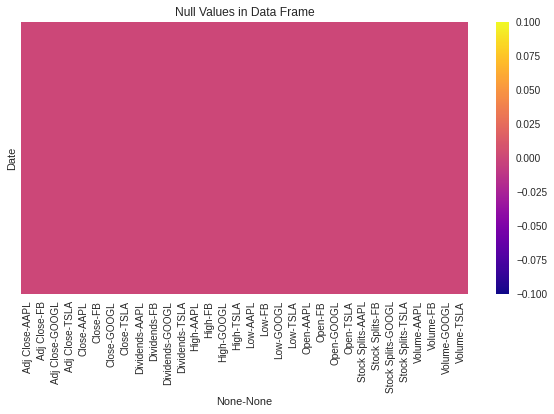

In [ ]:
#plot the missing values on a heatmap

plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(portfolio.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

In [ ]:
#Search for Missing Values in the SP500 Dataset
# No missing values exist in the data
sp500.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Text(0.5, 1.0, 'Null Values in Data Frame')

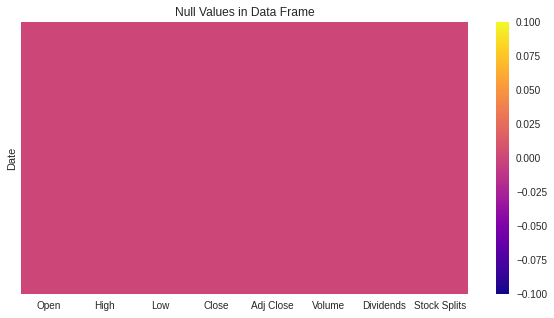

In [ ]:
#plot the missing values on a heatmap

plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(sp500.isnull(), yticklabels = False, cmap = 'plasma')
plt.title('Null Values in Data Frame')

# **Duplicates**

In [ ]:
#checking for duplicates in Yahoo Stock Finance dataset
# No duplicates in our dataset
portfolio.duplicated().sum()

0

In [ ]:
#Checking for Duplicates in the S&P 500 Dataset
# No duplicates in our dataset
sp500.duplicated().sum()

0

# **Exploratory Data Analysis and Visualization**

# **BIVARIATE DATA ANALYSIS**

# **S&P 500 Exploratory Data Analysis**

In [ ]:
sp500['Adj Close'].plot(figsize=(15,10))
plt.ylabel('Share Price')
plt.title('Ajusted Close Price Between 2014 and 2019')

Text(0.5, 1.0, 'Ajusted Close Price Between 2014 and 2019')

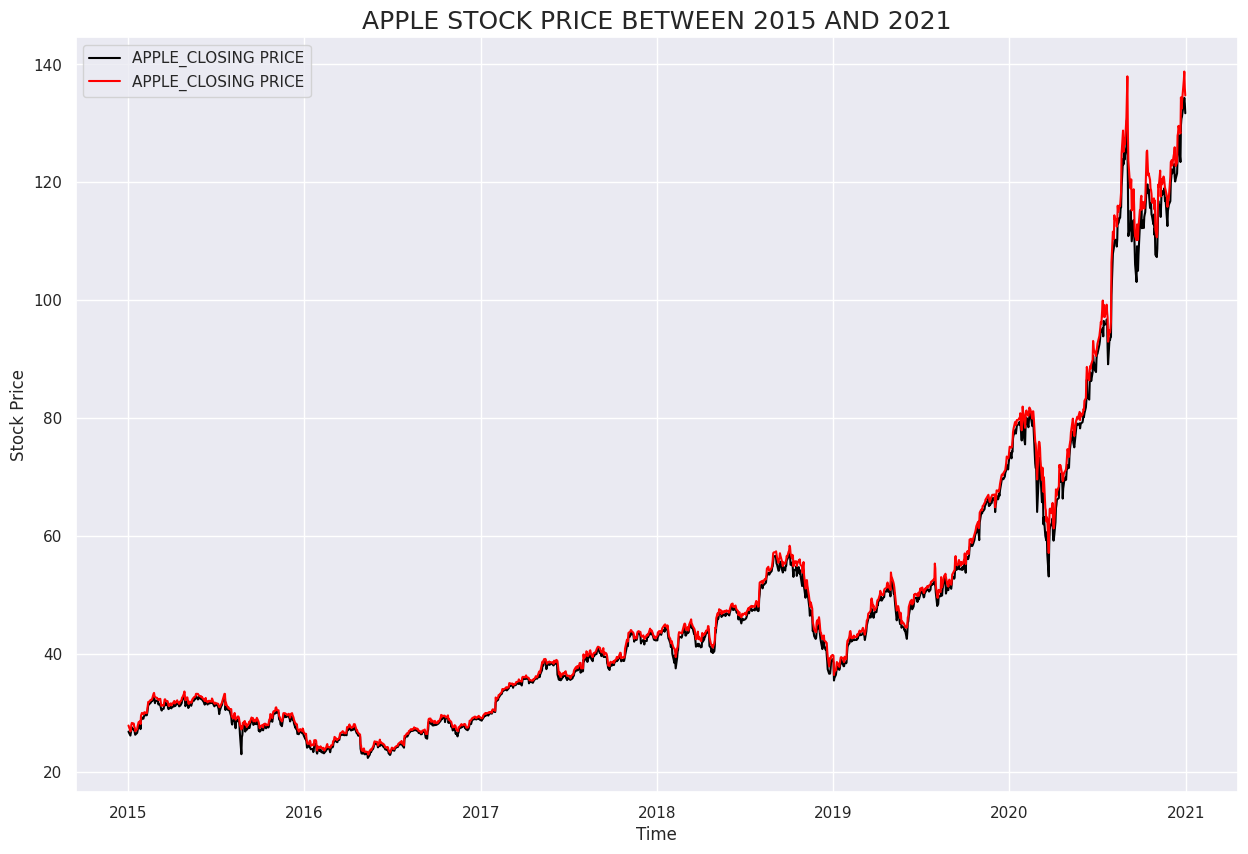

In [ ]:
# Bivariate analysis is the kind of analysis which focuses on two variables that are relevant to the analysis
# Here I focus on Apple's opening and closing stock prices for our historical data
# Data between 2015 and 2021
# Plot of prices is provided below
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(portfolio['Low','AAPL'],color='black',label='APPLE_CLOSING PRICE')
plt.plot(portfolio['High','AAPL'],color='red',label='APPLE_CLOSING PRICE')  
plt.title("APPLE STOCK PRICE BETWEEN 2015 AND 2021", fontsize=18)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

In [ ]:
# Here I focus on Facebook's opening and closing stock prices for our historical data
# Data between 2015 and 2021
# Plot of prices is provided below
open_googl = portfolio['Open', 'FB']
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(open_googl,color='Blue',label='FACEBOOK_OPENING PRICE')
plt.plot(portfolio['Close', 'FB'],color='red',label='FACEBOOK_CLOSING PRICE')  
plt.title("FACEBOOK STOCK PRICE BETWEEN 2015 AND 2021", fontsize=18)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

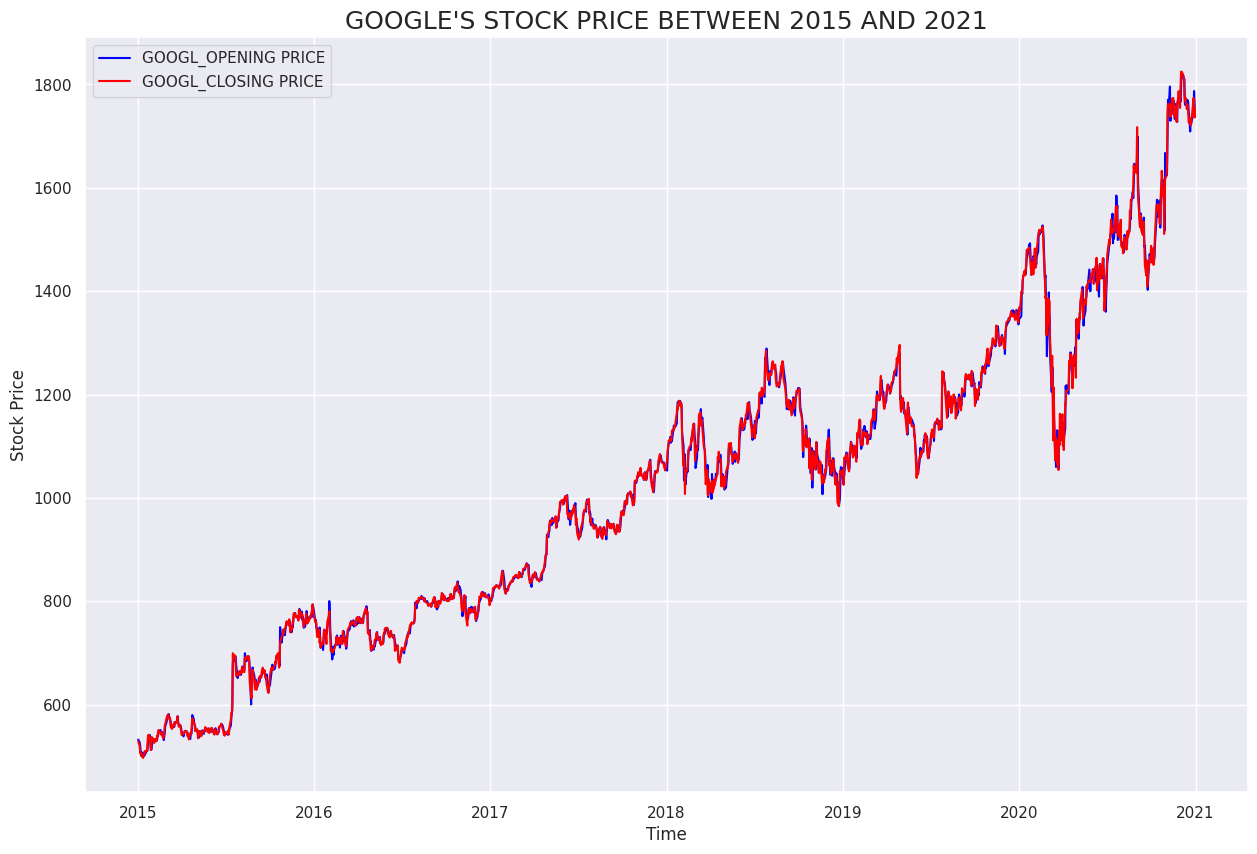

In [ ]:
# Here I focus on Google's opening and closing stock prices for our historical data
# Data between 2015 and 2021
# Plot of prices is provided below
open_googl = portfolio['Open', 'GOOGL']
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(open_googl,color='Blue',label='GOOGL_OPENING PRICE')
plt.plot(portfolio['Close', 'GOOGL'],color='red',label='GOOGL_CLOSING PRICE')  
plt.title("GOOGLE'S STOCK PRICE BETWEEN 2015 AND 2021", fontsize=18)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

In [ ]:
# Here I focus on Tesla's opening and closing stock prices for our historical data
# Opening prices : price stock commences trading when opening bell rang
# Closing prices : final price stock trades in a regular trading session
# Data between 2015 and 2021
# Plot of prices is provided below
open_googl = portfolio['Open', 'TSLA']
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(open_googl,color='Blue',label='TESLA_OPENING PRICE')
plt.plot(portfolio['Close', 'TSLA'],color='red',label='TESLA_CLOSING PRICE')  
plt.title("TESLA STOCK PRICE BETWEEN 2015 AND 2021", fontsize=18)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Close','FB'],color='red',label='FB_CLOSE PRICE Stock Price')
plt.plot(portfolio['Close','TSLA'],color='blue',label='TESLA_CLOSE Stock Price')
plt.title(' TESLA VS APPLE CLOSE PRICES')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Comparison of Facebook versus Google close prices
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Close','FB'],color='red',label='FB_CLOSE PRICE Stock Price')
plt.plot(portfolio['Close','GOOGL'],color='blue',label='GOOGLE_CLOSE Stock Price')
plt.title(' FACEBOOK VS GOOGLE CLOSE PRICES')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

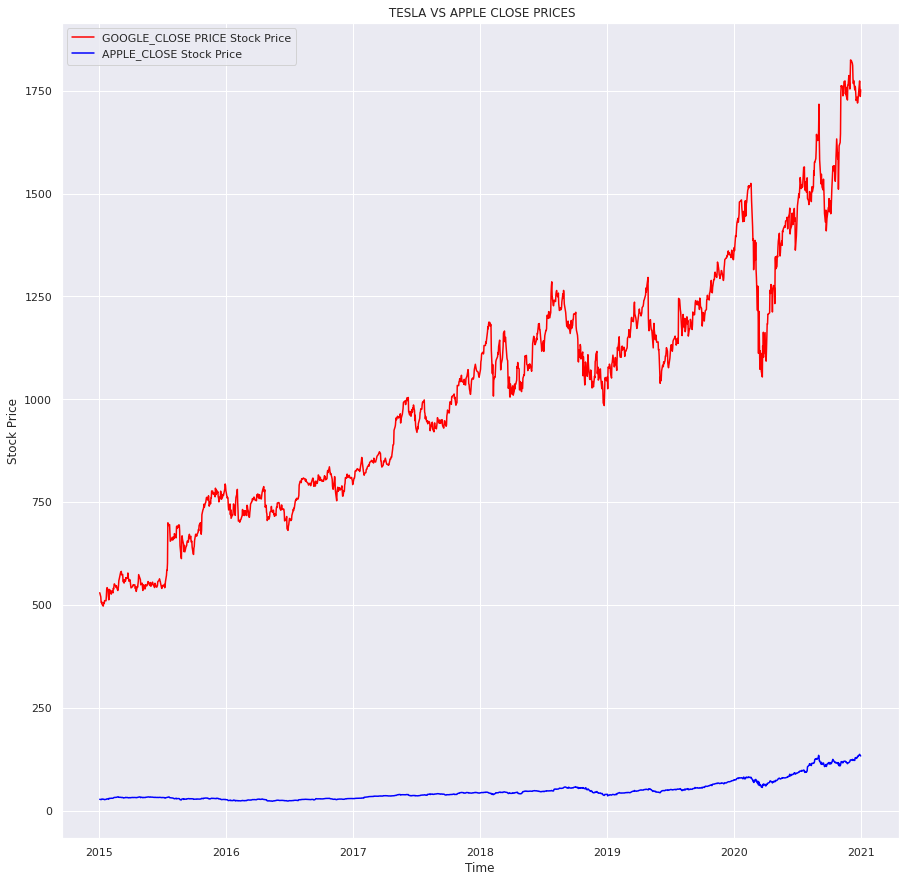

In [ ]:
# Comparison of Tesla versus Apple close prices
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Close','GOOGL'],color='red',label='GOOGLE_CLOSE PRICE Stock Price')
plt.plot(portfolio['Close','AAPL'],color='blue',label='APPLE_CLOSE Stock Price')
plt.title(' TESLA VS APPLE CLOSE PRICES')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **Average Stock Price**

A new column is created for each company; Google, Apple, Facebook and Tesla to get average value of the price of the column.

In [ ]:
#Creating new Google column 
portfolio['Price', 'GOOGL'] = (portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['High'] +  portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['Low'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='AAPL']['Open'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['Close'])/4

In [ ]:
#Creating new Tesla column 
portfolio['Price', 'TSLA'] = (portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['High'] +  portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Low'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Open'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Close'])/4


In [ ]:
# Average Price Column for Tesla stocks
# From the descriptive statistics below,  75% of the stocks have a price of under 69$
# Indicates bigger companies dominate the stock market 
portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Price'].describe()

TSLA
count  1511.000000
mean     93.193121
std     111.991150
min      29.544000
25%      45.477250
50%      56.790000
75%      69.380498
max     703.874985

# **Univariate Analysis**

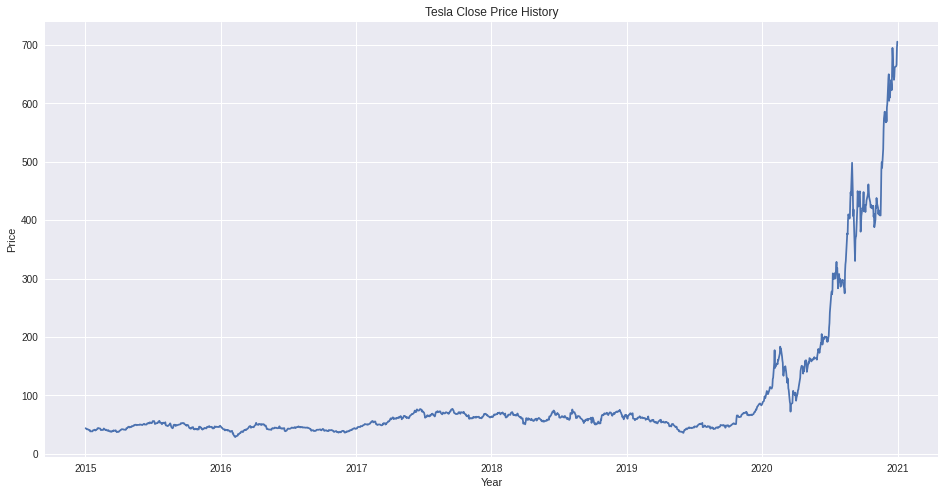

In [ ]:
# Univariate analysis is the kind of analysis which focuses on one variable in specific
# Here I focus on the history of the Tesla stock close price
# Plot of the price is provided below
plt.figure(figsize=(16,8))
plt.title('Tesla Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Close'])
plt.show()

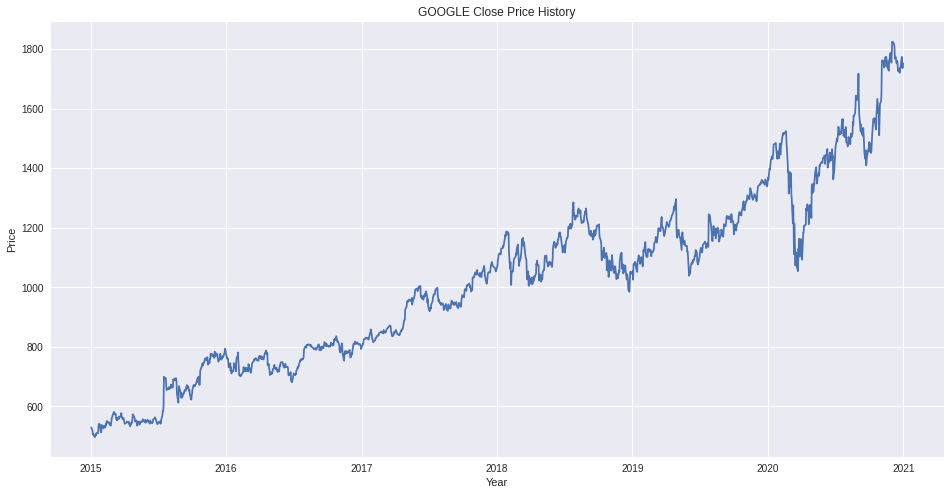

In [ ]:
# Here I focus on the history of the Google stock close price
# Plot of the price is provided below
plt.figure(figsize=(16,8))
plt.title('GOOGLE Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['Close'])
plt.show()

In [ ]:
# Here I focus on the history of the Apple stock close price
# Plot of the price is provided below
plt.figure(figsize=(16,8))
plt.title('Apple Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='AAPL']['Close'])
plt.show()

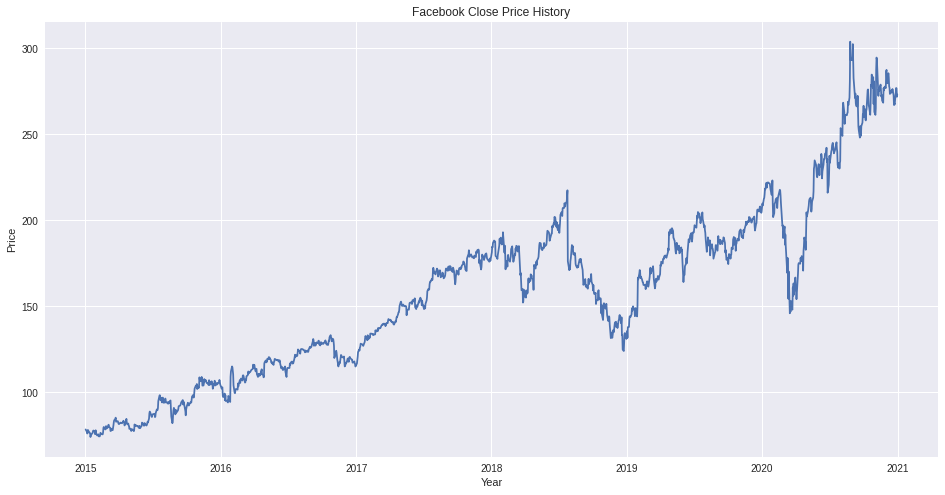

In [ ]:
# Here I focus on the history of the Facebook stock close price
# Plot of the price is provided below
plt.figure(figsize=(16,8))
plt.title('Facebook Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='FB']['Close'])
plt.show()

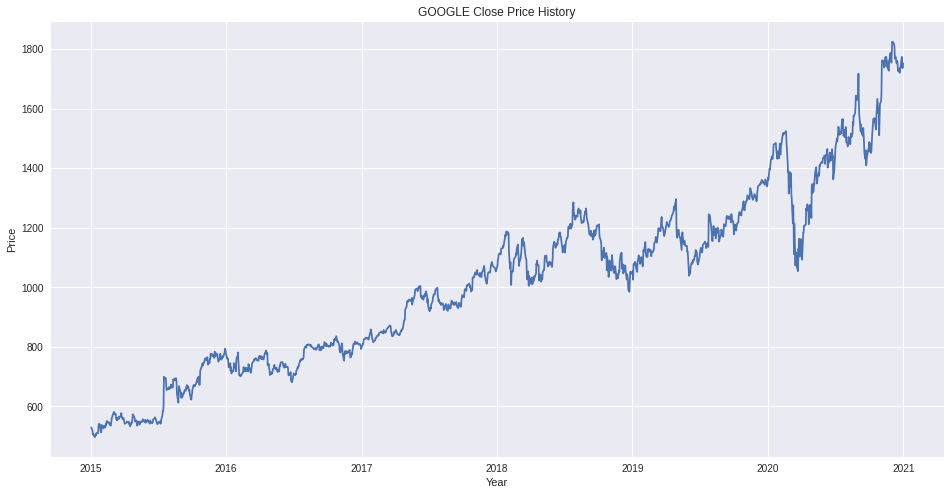

In [ ]:
# Here I focus on the history of the Google stock close price
# Plot of the price is provided below
plt.figure(figsize=(16,8))
plt.title('GOOGLE Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['Close'])
plt.show()

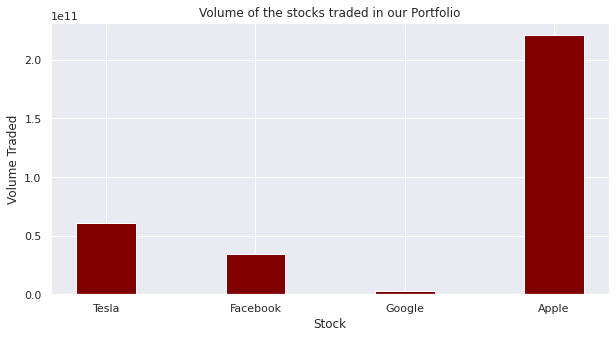

In [ ]:
# Graph showing the volume ofstocks traded for the four companies: Apple, Google, Facebook and Tesla
data = {'Tesla':portfolio['Volume', 'TSLA'].sum(),'Facebook':portfolio['Volume', 'FB'].sum(),'Google':portfolio['Volume', 'GOOGL'].sum(),
'Apple':portfolio['Volume', 'AAPL'].sum()}
Stock = list(data.keys())
Volatility = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Stock, Volatility, color ='maroon',
        width = 0.4)
 
plt.xlabel("Stock")
plt.ylabel("Volume Traded")
plt.title("Volume of the stocks traded in our Portfolio")
plt.show()

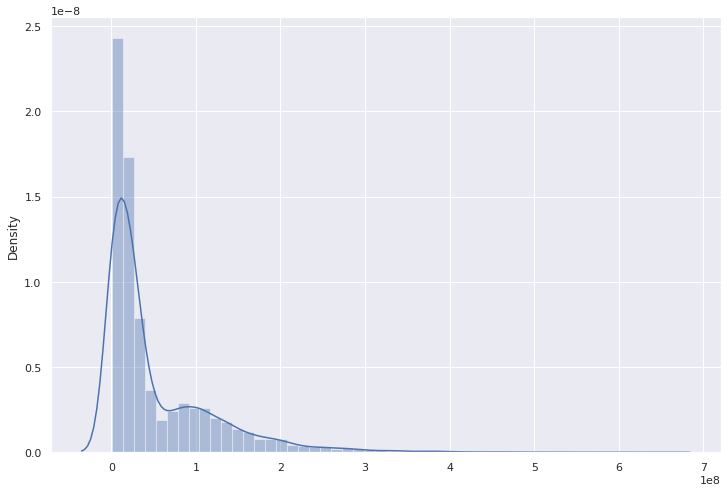

In [ ]:
# Graph showing the volume of the Yahoo Stock Finance portfolio
plt.figure(figsize=(12,8))
sns.distplot(portfolio['Volume'])
plt.show()

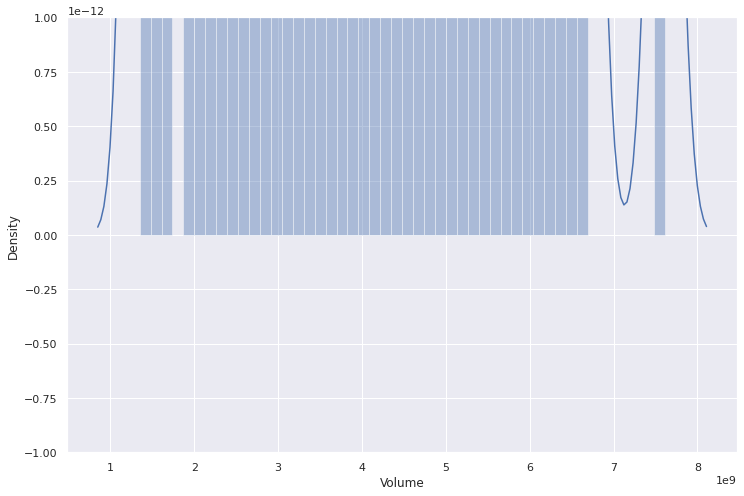

In [ ]:
# Graph showing the volume of the S&P 500 portfolio
plt.figure(figsize=(12,8))
sns.distplot(sp500['Volume'])
plt.show()



# **MULTIVARIATE ANALYSIS**

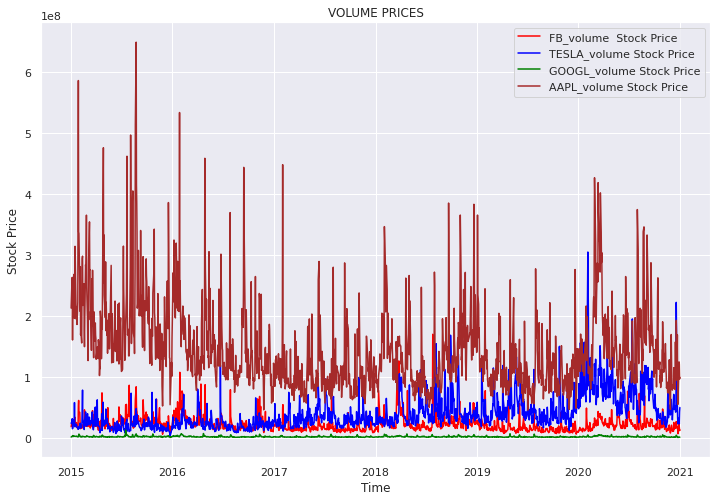

In [ ]:
# Visualization of Volume Prices 
# Volume prices of the four companies: Facebook, Google, Tesla and Apple
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(portfolio['Volume', 'FB'],color='red',label='FB_volume  Stock Price')
plt.plot(portfolio['Volume', 'TSLA'],color='blue',label='TESLA_volume Stock Price')
plt.plot(portfolio['Volume', 'GOOGL'],color='green',label='GOOGL_volume Stock Price')
plt.plot(portfolio['Volume', 'AAPL'],color='brown',label='AAPL_volume Stock Price')
plt.title('VOLUME PRICES')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#Visualization of high stock prices
# High stock prices of the four companies: Facebook, Google, Tesla and Apple
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['High', 'FB'],color='red',label='FB_high PRICE Stock Price')
plt.plot(portfolio['High', 'TSLA'],color='blue',label='TESLA_high Stock Price')
plt.plot(portfolio['High', 'GOOGL'],color='green',label='GOOGL_high Stock Price')
plt.plot(portfolio['High', 'AAPL'],color='brown',label='AAPL_high Stock Price')
plt.title('HIGH PRICES')
plt.xlabel('Time')
plt.ylabel(' HIGH Stock Price')
plt.legend()
plt.show()

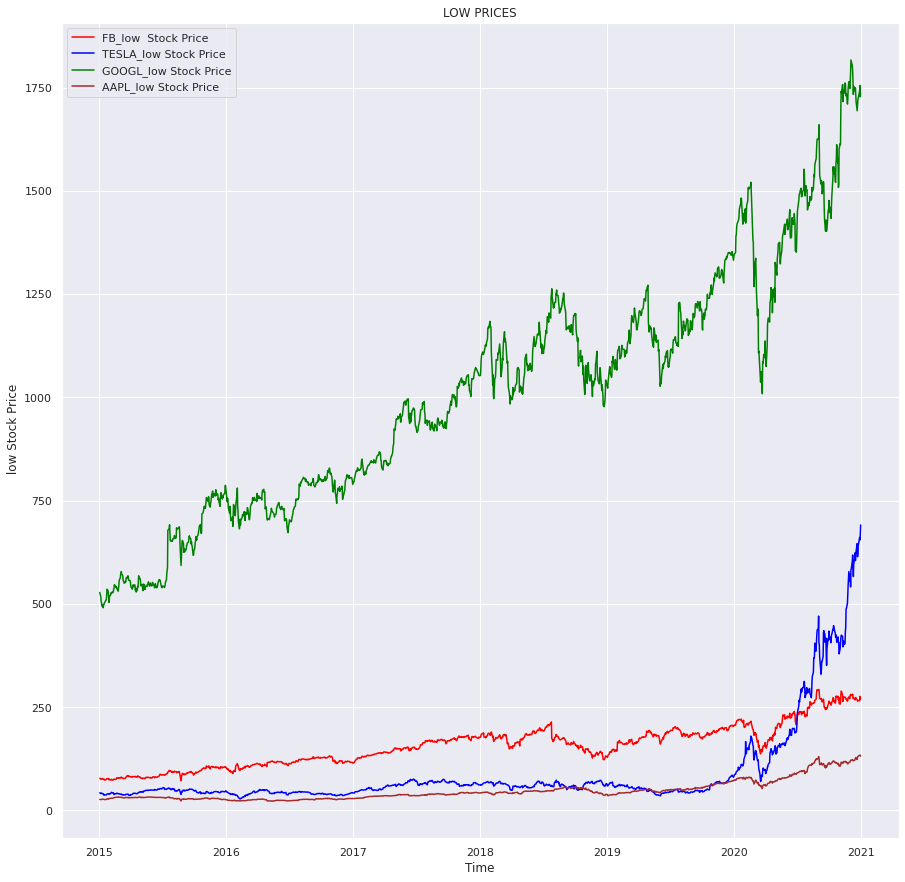

In [ ]:
#Visualization of low stock prices
# Low stock prices of the four companies: Facebook, Google, Tesla and Apple
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Low', 'FB'],color='red',label='FB_low  Stock Price')
plt.plot(portfolio['Low', 'TSLA'],color='blue',label='TESLA_low Stock Price')
plt.plot(portfolio['Low', 'GOOGL'],color='green',label='GOOGL_low Stock Price')
plt.plot(portfolio['Low', 'AAPL'],color='brown',label='AAPL_low Stock Price')
plt.title('LOW PRICES')
plt.xlabel('Time')
plt.ylabel(' low Stock Price')
plt.legend()
plt.show()

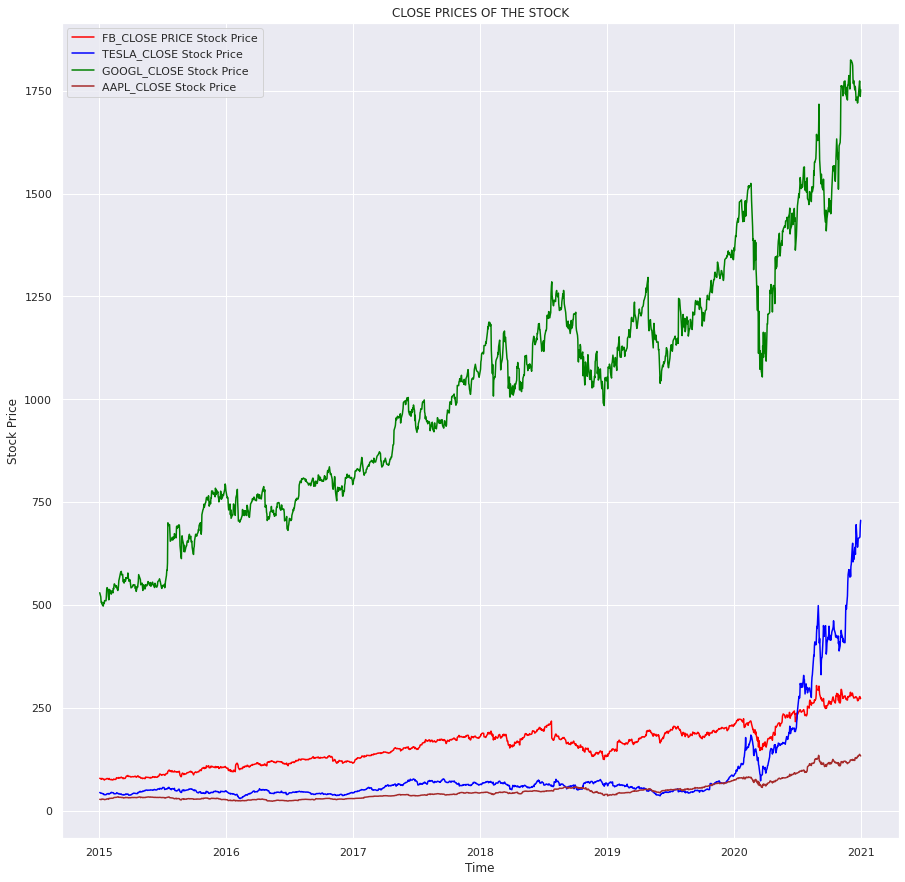

In [ ]:
# Visualization of closing prices
# Closing prices of the four companies: Facebook, Google, Tesla and Apple
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Close', 'FB'],color='red',label='FB_CLOSE PRICE Stock Price')
plt.plot(portfolio['Close', 'TSLA'],color='blue',label='TESLA_CLOSE Stock Price')
plt.plot(portfolio['Close', 'GOOGL'],color='green',label='GOOGL_CLOSE Stock Price')
plt.plot(portfolio['Close', 'AAPL'],color='brown',label='AAPL_CLOSE Stock Price')
plt.title('CLOSE PRICES OF THE STOCK')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

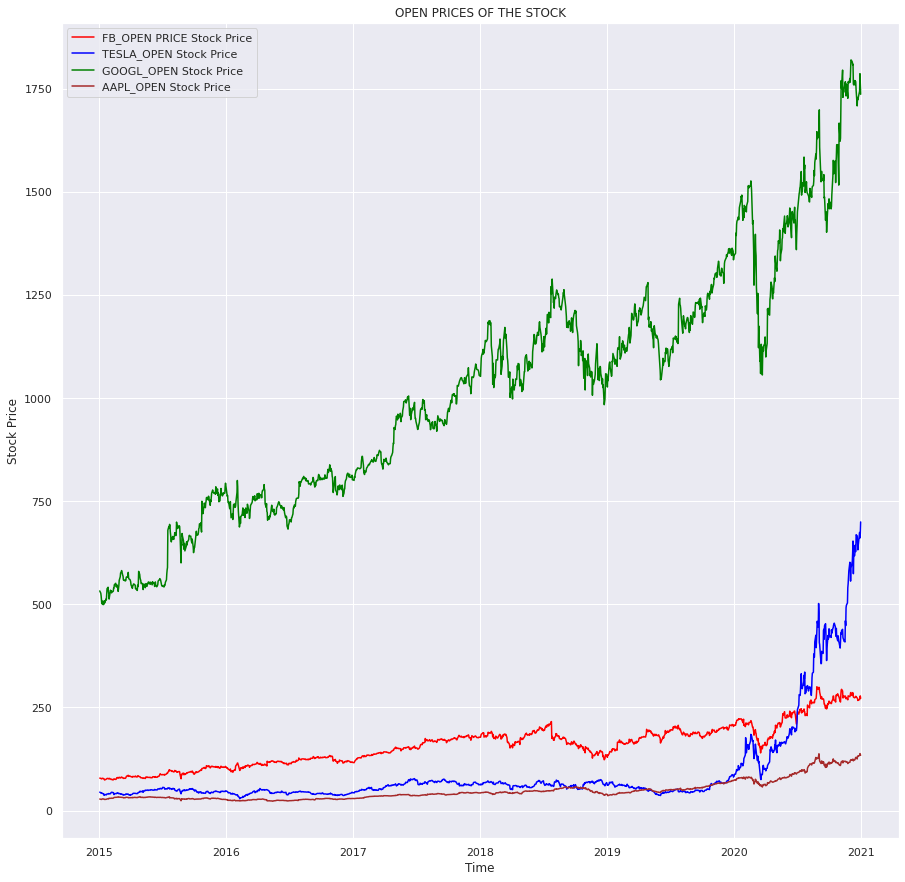

In [ ]:
# Visualization of opening prices
# Opening prices of the four companies: Facebook, Google, Tesla and Apple
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Open', 'FB'],color='red',label='FB_OPEN PRICE Stock Price')
plt.plot(portfolio['Open', 'TSLA'],color='blue',label='TESLA_OPEN Stock Price')
plt.plot(portfolio['Open', 'GOOGL'],color='green',label='GOOGL_OPEN Stock Price')
plt.plot(portfolio['Open', 'AAPL'],color='brown',label='AAPL_OPEN Stock Price')
plt.title('OPEN PRICES OF THE STOCK')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#Stock Volatility


Market volatility is regularly measured using standard deviation which is the appropriate statistical measure as it measures how widely prices are dispersed from the mean price. 

Low standard deviation symbolizes low volatility which occurs if prices trade in a narrow trading range. 

In contrast, high standard deviation symbolizes high volatility which occurs if prices trade in a wide trading range, this is a situation where prices swing wildly up and down.

The higher the volatility, the higher the standard deviation. The lower the volatility the lower the standard deviation. I measure the volatility of our stock portfolio below.

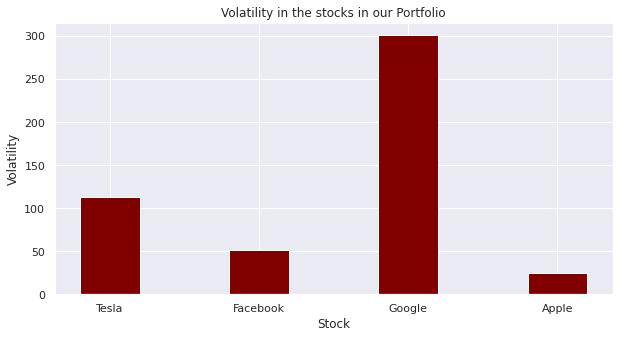

In [ ]:
#Visualization of stock portfolio volatility 
data = {'Tesla':portfolio['Close', 'TSLA'].std(),'Facebook':portfolio['Close', 'FB'].std(),'Google':portfolio['Close', 'GOOGL'].std(),
'Apple':portfolio['Close', 'AAPL'].std()}
Stock = list(data.keys())
Volatility = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Stock, Volatility, color ='maroon',
        width = 0.4)
 
plt.xlabel("Stock")
plt.ylabel("Volatility")
plt.title("Volatility in the stocks in our Portfolio")
plt.show()

In [ ]:
# Stock portfolio volatility
# The results below indicate that Google is the most volatile stock in the portfolio
Stocks = ['TSLA','FB','GOOGL','AAPL']
for s in Stocks:
  volatility = portfolio.iloc[:, portfolio.columns.get_level_values(1)==s]['Close'].std()
  print(f'The Volatility of {s} is : ',volatility)


The Volatility of TSLA is :  TSLA    112.492452
dtype: float64
The Volatility of FB is :  FB    51.216046
dtype: float64
The Volatility of GOOGL is :  GOOGL    300.194255
dtype: float64
The Volatility of AAPL is :  AAPL    25.091074
dtype: float64


The measurement of the standard deviation shows Google, at 300.19 has the highest volatility among the stock included in the portfolio meaning it may give better short term investment opportunities. 

Apple has the lowest volatility at 25.09, followed by Facebook at a higher volatility of 51.21 and followed lastly by Tesla at an even higher volatility of 112.49

# **S&P 500 Modelling**

#LONG SHORT TERM MEMORY MODEL

In [ ]:
#Preparing and scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(sp500['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
#X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Sequential Model: adding layers 1 to 4 and the output layer 
# dropping features
model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

# **Fitting the Model**

In [ ]:
# Fit the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 35, batch_size = 32)

Epoch 1/35
38/38 [==============================] - 8s 81ms/step - loss: 0.0672
Epoch 2/35
38/38 [==============================] - 3s 83ms/step - loss: 0.0048
Epoch 3/35
38/38 [==============================] - 3s 82ms/step - loss: 0.0037
Epoch 4/35
38/38 [==============================] - 3s 82ms/step - loss: 0.0039
Epoch 5/35
38/38 [==============================] - 3s 83ms/step - loss: 0.0039
Epoch 6/35
38/38 [==============================] - 3s 82ms/step - loss: 0.0038
Epoch 7/35
38/38 [==============================] - 3s 84ms/step - loss: 0.0037
Epoch 8/35
38/38 [==============================] - 3s 82ms/step - loss: 0.0038
Epoch 9/35
38/38 [==============================] - 3s 83ms/step - loss: 0.0030
Epoch 10/35
38/38 [==============================] - 3s 83ms/step - loss: 0.0030
Epoch 11/35
38/38 [==============================] - 3s 82ms/step - loss: 0.0037
Epoch 12/35
38/38 [==============================] - 3s 82ms/step - loss: 0.0034
Epoch 13/35
38/38 [==================

In [ ]:
test_data = yf.download('^GSPC',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((sp500['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

# **Model Predictions**

In [ ]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)

#Reverse scaling the prices

predicted_prices = scaler.inverse_transform(predicted_prices)

# **Model Prediction Visualization**

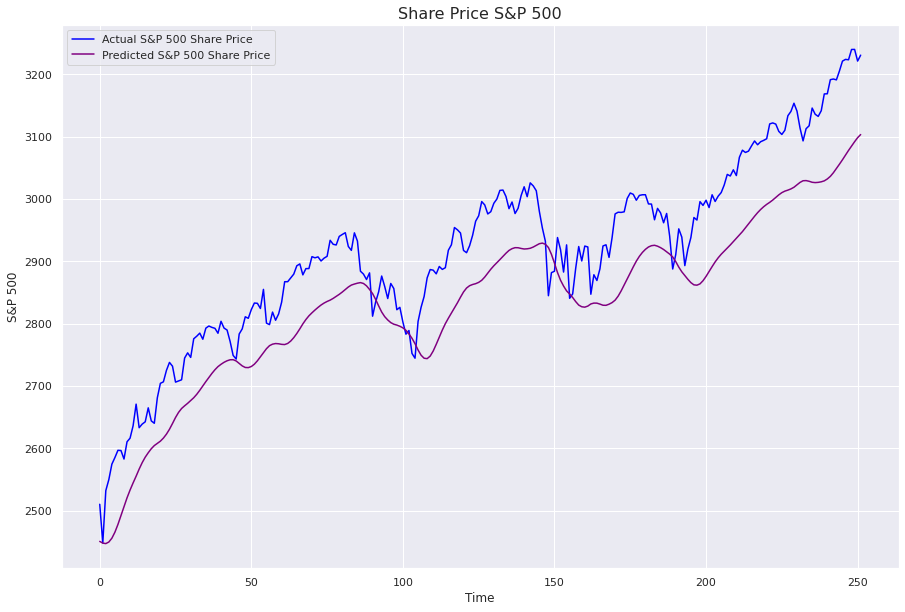

In [ ]:
# Visualization of the test data predictions
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'blue', label = 'Actual S&P 500 Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted S&P 500 Share Price')
plt.title('Share Price S&P 500', fontsize=16)
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend();

# Apple Stock Model

In [ ]:
# Apple 2015-2021 Data 
Apple = yf.download('AAPL',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
Apple.head(10)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.468657  234684800   
2014-01-03  19.745001  19.775000  19.301071  19.320715  17.084940  392467600   
2014-01-06  19.194643  19.528570  19.057142  19.426071  17.178104  412610800   
2014-01-07  19.440001  19.498571  19.211430  19.287144  17.055250  317209200   
2014-01-08  19.243214  19.484285  19.238930  19.409286  17.163254  258529600   
2014-01-09  19.528570  19.530714  19.119642  19.161428  16.944086  279148800   
2014-01-10  19.279642  19.314285  18.968214  19.033571  16.831024  304976000   
2014-01-13  18.925358  19.375000  18.924286  19.133215  16.919134  378492800   
2014-01-14  19.222143  19.526072  19.202143  19.513929  17.255793  332561600   
2014-01-15  19.768572  20.007143  19.702143  19.905714  17.602243  391638800   

            Dividends  Stock Splits  
Date                                 
2014-01-02        0.0           0.0  
2014-01-03        0.0           0.0  
2014-01-06        0.0           0.0  
2014-01-07        0.0           0.0  
2014-01-08        0.0           0.0  
2014-01-09        0.0           0.0  
2014-01-10        0.0           0.0  
2014-01-13        0.0           0.0  
2014-01-14        0.0           0.0  
2014-01-15        0.0           0.0

In [ ]:
#Import Scaler
from sklearn.preprocessing import MinMaxScaler

import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Apple['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
# Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(units=1))

In [ ]:
#Fit model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 8s 79ms/step - loss: 0.0579
Epoch 2/15
38/38 [==============================] - 3s 83ms/step - loss: 0.0039
Epoch 3/15
38/38 [==============================] - 3s 83ms/step - loss: 0.0038
Epoch 4/15
38/38 [==============================] - 3s 82ms/step - loss: 0.0032
Epoch 5/15
38/38 [==============================] - 3s 82ms/step - loss: 0.0036
Epoch 6/15
38/38 [==============================] - 3s 83ms/step - loss: 0.0029
Epoch 7/15
38/38 [==============================] - 3s 82ms/step - loss: 0.0027
Epoch 8/15
38/38 [==============================] - 3s 80ms/step - loss: 0.0036
Epoch 9/15
38/38 [==============================] - 3s 82ms/step - loss: 0.0027
Epoch 10/15
38/38 [==============================] - 3s 82ms/step - loss: 0.0027
Epoch 11/15
38/38 [==============================] - 3s 82ms/step - loss: 0.0030
Epoch 12/15
38/38 [==============================] - 3s 82ms/step - loss: 0.0025
Epoch 13/15
38/38 [==================

In [ ]:
test_data = yf.download('AAPL',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((Apple['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
# Predictions
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Reverse price scaling
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

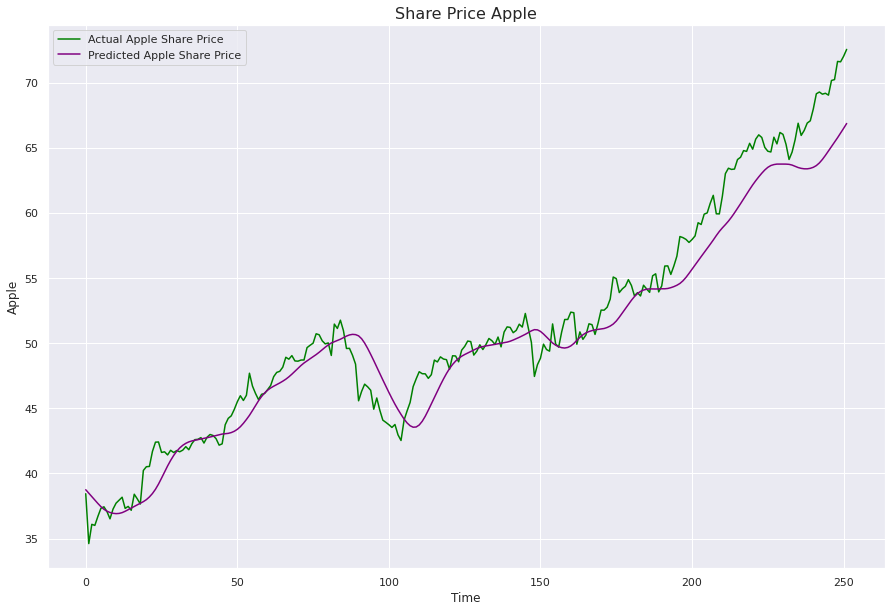

In [ ]:
# Plot test data predictions
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'green', label = 'Actual Apple Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted Apple Share Price')
plt.title('Share Price Apple', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Apple')
plt.legend();

In [ ]:
# Find the root mean squared error
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

1.054737030513703

# Facebook Stock Model

In [ ]:
# Facebook 2015-2021 Data 
Facebook = yf.download('FB',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Facebook['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
#Empty X_train and Y_train
X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#Dropping some features
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [ ]:
#Fit the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 8s 78ms/step - loss: 0.0788
Epoch 2/15
38/38 [==============================] - 3s 79ms/step - loss: 0.0063
Epoch 3/15
38/38 [==============================] - 3s 80ms/step - loss: 0.0036
Epoch 4/15
38/38 [==============================] - 3s 80ms/step - loss: 0.0042
Epoch 5/15
38/38 [==============================] - 3s 79ms/step - loss: 0.0040
Epoch 6/15
38/38 [==============================] - 3s 79ms/step - loss: 0.0033
Epoch 7/15
38/38 [==============================] - 3s 79ms/step - loss: 0.0030
Epoch 8/15
38/38 [==============================] - 3s 79ms/step - loss: 0.0028
Epoch 9/15
38/38 [==============================] - 3s 79ms/step - loss: 0.0028
Epoch 10/15
38/38 [==============================] - 3s 79ms/step - loss: 0.0035
Epoch 11/15
38/38 [==============================] - 3s 80ms/step - loss: 0.0027
Epoch 12/15
38/38 [==============================] - 3s 80ms/step - loss: 0.0030
Epoch 13/15
38/38 [==================

In [ ]:
# Test data 
test_data = yf.download('FB',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((Facebook['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
# The predictions
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Reverse price scaling

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [ ]:
# Plot test data predictions 
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'green', label = 'Actual Facebook Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted Facebook Share Price')
plt.title('Share Price Facebook', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Facebook')
plt.legend();

In [ ]:
# Find the root mean squared error
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

5.268987443712023

# Google Stock Model

In [ ]:
# Google 2015-2021 Data 
Google = yf.download('GOOGL',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Google['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
# Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [ ]:
#Fit model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 8s 77ms/step - loss: 0.0509
Epoch 2/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0044
Epoch 3/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0036
Epoch 4/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0041
Epoch 5/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0035
Epoch 6/15
38/38 [==============================] - 3s 82ms/step - loss: 0.0039
Epoch 7/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0034
Epoch 8/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0038
Epoch 9/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0036
Epoch 10/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0032
Epoch 11/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0032
Epoch 12/15
38/38 [==============================] - 3s 81ms/step - loss: 0.0038
Epoch 13/15
38/38 [==================

In [ ]:
# Test Data
test_data = yf.download('GOOGL',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((Google['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
# The predictions
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Reverse price scaling

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [ ]:
# Plot test data predictions
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'green', label = 'Actual Google Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted Google Share Price')
plt.title('Share Price Google', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Google')
plt.legend();

In [ ]:
# Find the root mean squared error
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

41.26512606181796

#Tesla Stock Model

In [ ]:
# Tesla 2015-2021 Data 
Tesla = yf.download('TSLA',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Tesla['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
#  Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [ ]:
#Fit the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 10s 13ms/step - loss: 0.0352
Epoch 2/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 3/15
38/38 [==============================] - 0s 12ms/step - loss: 0.0097
Epoch 4/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0080
Epoch 5/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 6/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0074
Epoch 7/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 8/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0069
Epoch 9/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 10/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0063
Epoch 11/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0057
Epoch 12/15
38/38 [==============================] - 0s 11ms/step - loss: 0.0057
Epoch 13/15
38/38 [=================

In [ ]:
# Test Data
test_data = yf.download('TSLA',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((Tesla['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
# The Predictions
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Reverse price scaling 
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [ ]:
# Find the root mean squared error
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

0.724222667633541

In [ ]:
# Plot test data predictions
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'green', label = 'Actual Tesla Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted Tesla Share Price')
plt.title('Share Price Tesla', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Tesla')
plt.legend();

# **Conclusion**

Model performs well as it generalizes well on the data. 

In conclusion, this good performance shows that we had the right data and the right question

# **Recommendation**

Thus the model is a recommendable model for use in other projects